In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
import math
import pickle

In [2]:
dff=pd.read_csv('Federal.csv')
dff

,Month,Year,Temp,Ice,veg,Flood,Rain(mm)
0,3,2000,24.030484,-0.123452,4005.3395,False,33.516
1,4,2000,36.019214,-0.217567,3388.6150,False,25.167
2,5,2000,39.772871,-0.237419,2488.4690,False,34.509
3,6,2000,35.715733,-0.148567,2671.7165,False,95.509
4,7,2000,31.886419,-0.051065,4731.4220,False,230.653
...,...,...,...,...,...,...,...
257,8,2021,29.171419,-0.233484,5316.1375,False,185.440
258,9,2021,29.863633,-0.306667,4940.6435,False,308.270
259,10,2021,25.775935,-0.349613,4414.5460,False,81.757
260,11,2021,21.943833,-0.399467,3995.8135,False,6.463


<AxesSubplot:>

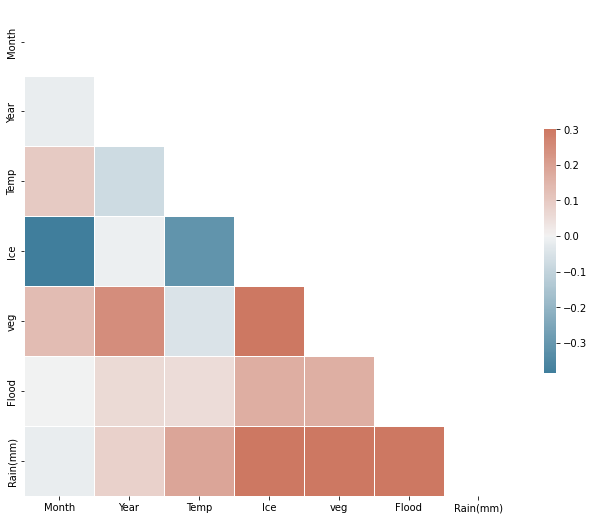

In [3]:
corr=dff.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [4]:
X=dff[['Month','Year']]
y=dff['Temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
lr_pred = regressor.predict(X_test)
lr_score=regressor.score(X_test,y_test)
expl_lr = explained_variance_score(lr_pred,y_test)

S_regressor = SVR(kernel='rbf')
S_regressor.fit(X_train, y_train)
S_pred = regressor.predict(X_test)
S_score=S_regressor.score(X_test,y_test)
expl_S = explained_variance_score(S_pred,y_test)

tr_regressor = DecisionTreeRegressor(random_state=42)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

rf_regressor = RandomForestRegressor(n_estimators=28,random_state=42)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

models_score =pd.DataFrame({'Model':['Linear Reg.','SVR','Decision Tree','Random forest Regression'],
                            'Temp-Score':[lr_score,S_score,decision_score,rf_score],
                            'Temp-Explained Variance':[expl_lr,expl_S,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Temp-Score',ascending=False)
pickle.dump(rf_regressor, open('F_Temp_rf.sav', 'wb'))

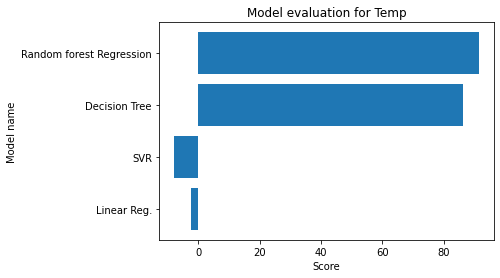

In [5]:
plt.barh(models_score['Model'], models_score['Temp-Score'].multiply(100))
plt.ylabel("Model name")
plt.xlabel("Score")
plt.title("Model evaluation for Temp")
plt.show()

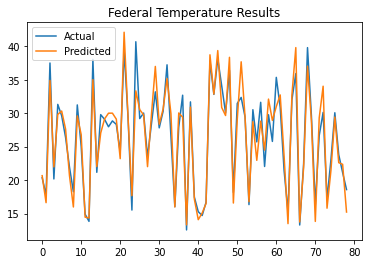

In [6]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_pred})
plt.title("Federal Temperature Results")
plt.plot(range(0,79), df['Actual'], label = "Actual")
plt.plot(range(0,79), df['Predicted'], label = "Predicted")
plt.legend()
plt.show()

In [7]:
X=dff[['Month','Year','Temp']]
y=dff['veg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
lr_pred = regressor.predict(X_test)
lr_score=regressor.score(X_test,y_test)
expl_lr = explained_variance_score(lr_pred,y_test)

S_regressor = SVR(kernel='rbf')
S_regressor.fit(X_train, y_train)
S_pred = regressor.predict(X_test)
S_score=S_regressor.score(X_test,y_test)
expl_S = explained_variance_score(S_pred,y_test)

tr_regressor = DecisionTreeRegressor(random_state=42)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

rf_regressor = RandomForestRegressor(n_estimators=28,random_state=42)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

models_score =pd.DataFrame({'Model':['Linear Reg.','SVR','Decision Tree','Random forest Regression'],
                            'Veg-Score':[lr_score,S_score,decision_score,rf_score],
                            'Veg-Explained Variance':[expl_lr,expl_S,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Veg-Score',ascending=False)
pickle.dump(rf_regressor, open('F_Veg_rf.sav', 'wb'))

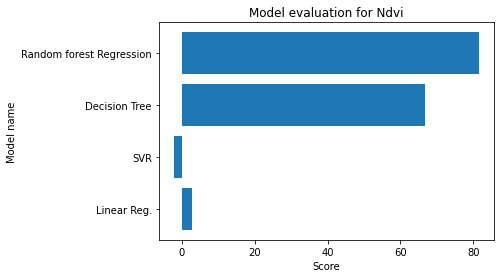

In [8]:
plt.barh(models_score['Model'], models_score['Veg-Score'].multiply(100))
plt.ylabel("Model name")
plt.xlabel("Score")
plt.title("Model evaluation for Ndvi")
plt.show()

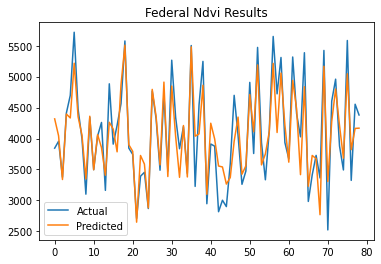

In [9]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_pred})
plt.title("Federal Ndvi Results")
plt.plot(range(0,79), df['Actual'], label = "Actual")
plt.plot(range(0,79), df['Predicted'], label = "Predicted")
plt.legend()
plt.show()

In [10]:
X=dff[['Month','Year','Temp']]
y=dff['Ice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
lr_pred = regressor.predict(X_test)
lr_score=regressor.score(X_test,y_test)
expl_lr = explained_variance_score(lr_pred,y_test)

S_regressor = SVR(kernel='rbf')
S_regressor.fit(X_train, y_train)
S_pred = regressor.predict(X_test)
S_score=S_regressor.score(X_test,y_test)
expl_S = explained_variance_score(S_pred,y_test)

tr_regressor = DecisionTreeRegressor(random_state=42)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

rf_regressor = RandomForestRegressor(n_estimators=28,random_state=42)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

models_score =pd.DataFrame({'Model':['Linear Reg.','SVR','Decision Tree','Random forest Regression'],
                            'Ice-Score':[lr_score,S_score,decision_score,rf_score],
                            'Ice-Explained Variance':[expl_lr,expl_S,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Ice-Score',ascending=False)
pickle.dump(rf_regressor, open('F_Ndsi_rf.sav', 'wb'))

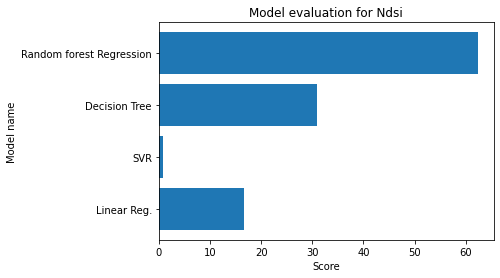

In [11]:
plt.barh(models_score['Model'], models_score['Ice-Score'].multiply(100))
plt.ylabel("Model name")
plt.xlabel("Score")
plt.title("Model evaluation for Ndsi")
plt.show()

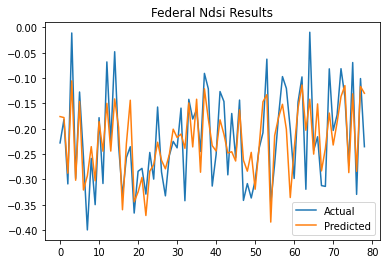

In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_pred})
plt.title("Federal Ndsi Results")
plt.plot(range(0,79), df['Actual'], label = "Actual")
plt.plot(range(0,79), df['Predicted'], label = "Predicted")
plt.legend()
plt.show()

In [13]:
X=dff[['Month','Year','Temp','Ice']]
y=dff['Rain(mm)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
lr_pred = regressor.predict(X_test)
lr_score=regressor.score(X_test,y_test)
expl_lr = explained_variance_score(lr_pred,y_test)

S_regressor = SVR(kernel='rbf')
S_regressor.fit(X_train, y_train)
S_pred = regressor.predict(X_test)
S_score=S_regressor.score(X_test,y_test)
expl_S = explained_variance_score(S_pred,y_test)

tr_regressor = DecisionTreeRegressor(random_state=42)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

rf_regressor = RandomForestRegressor(n_estimators=1000,random_state=42)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

models_score =pd.DataFrame({'Model':['Linear Reg.','SVR','Decision Tree','Random forest Regression'],
                            'Rain-Score':[lr_score,S_score,decision_score,rf_score],
                            'Rain-Explained Variance':[expl_lr,expl_S,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Rain-Score',ascending=False)
pickle.dump(rf_regressor, open('F_Rain_rf.sav', 'wb'))


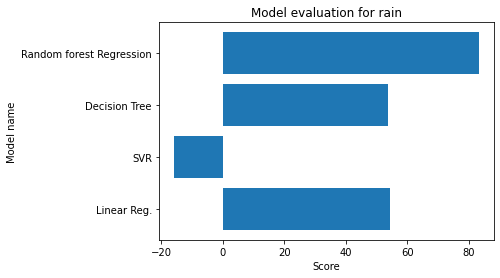

In [14]:
plt.barh(models_score['Model'], models_score['Rain-Score'].multiply(100))
plt.ylabel("Model name")
plt.xlabel("Score")
plt.title("Model evaluation for rain")
plt.show()

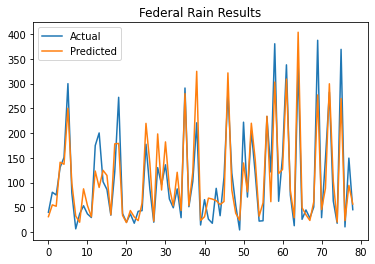

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_pred})
plt.title("Federal Rain Results")
plt.plot(range(0,79), df['Actual'], label = "Actual")
plt.plot(range(0,79), df['Predicted'], label = "Predicted")
plt.legend()
plt.show()